In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',50, 500)
    learning_rate = trial.suggest_float('learning_rate',0.01, 0.2, log=True)
    max_depth= trial.suggest_int('max_depth',2, 20)
    min_samples_split = trial.suggest_int('min_samples_split',2,20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',2, 20)
    subsample = trial.suggest_float('subsample', 0.2, 1.0)
    max_features= trial.suggest_categorical('max_features',{None,"sqrt","log2"})

    pipeline = Pipeline([
        ('scaler',StandardScaler()),
        ('gbc',GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf, subsample=subsample,max_features=max_features, random_state=42))
    ])
    score = cross_val_score(pipeline, x_train, y_train, cv =5, scoring ='accuracy').mean()
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials =50)

best_params = study.best_params

best_model = Pipeline([
    ('scaler',StandardScaler()),
    ('gbc',GradientBoostingClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'], subsample=best_params['subsample'],max_features=best_params['max_features'], random_state=42))
])

[I 2025-02-08 20:27:47,167] A new study created in memory with name: no-name-80f52961-11cd-4f4a-9c58-96503a2265bd
[I 2025-02-08 20:27:49,742] Trial 0 finished with value: 0.7615757575757576 and parameters: {'n_estimators': 191, 'learning_rate': 0.030942284832305236, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 14, 'subsample': 0.4390378489551823, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7615757575757576.
[I 2025-02-08 20:27:50,791] Trial 1 finished with value: 0.7555151515151515 and parameters: {'n_estimators': 53, 'learning_rate': 0.056017591365376006, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.40162498372684774, 'max_features': None}. Best is trial 0 with value: 0.7615757575757576.
[I 2025-02-08 20:27:55,390] Trial 2 finished with value: 0.7595555555555554 and parameters: {'n_estimators': 300, 'learning_rate': 0.010203632383375195, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 10, 'subsample': 0.534365

In [ ]:
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
print(y_pred)

In [ ]:
proba = best_model.predict_proba(x_test)
print(proba)

In [ ]:
prediksi = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\diabetespredict.csv")
prediksi.head()

In [ ]:
y_prediksi = best_model.predict(prediksi)
probabilitas_prediksi = best_model.predict_proba(prediksi)
print(y_prediksi)
print(probabilitas_prediksi)

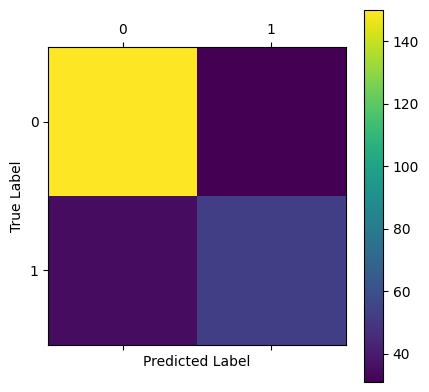

In [22]:
matrix = confusion_matrix(y_test, y_pred)

plt.matshow(matrix)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7546468401486989

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       181
           1       0.63      0.60      0.62        88

    accuracy                           0.75       269
   macro avg       0.72      0.72      0.72       269
weighted avg       0.75      0.75      0.75       269



Text(113.9222222222222, 0.5, 'true value')

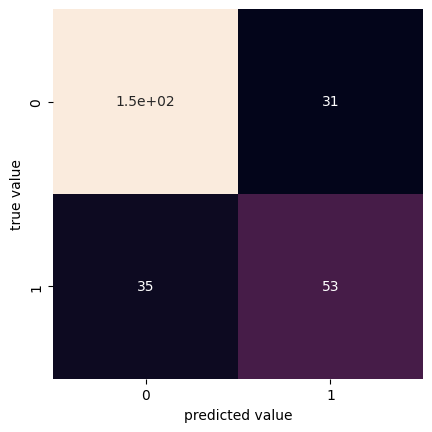

In [24]:
sns.heatmap(matrix, square  =True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [25]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.84       0.7        0.85       0.68       0.81818182]
Mean CV Accuracy: 0.7776363636363637


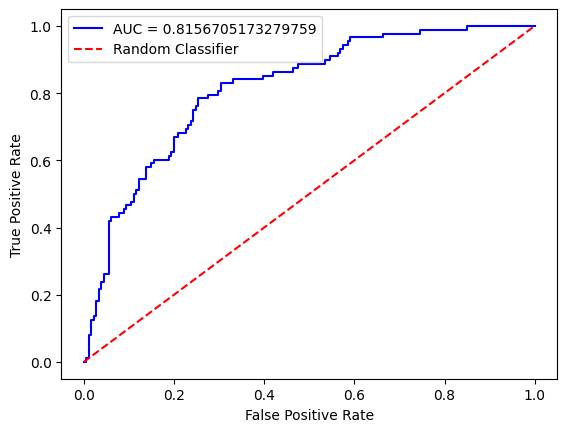

In [26]:
prob_estimate = best_model.predict_proba(x_test)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimate[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr,'b',label = f'AUC = {nilai_auc}')
plt.plot([0,1],[0,1], 'r--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

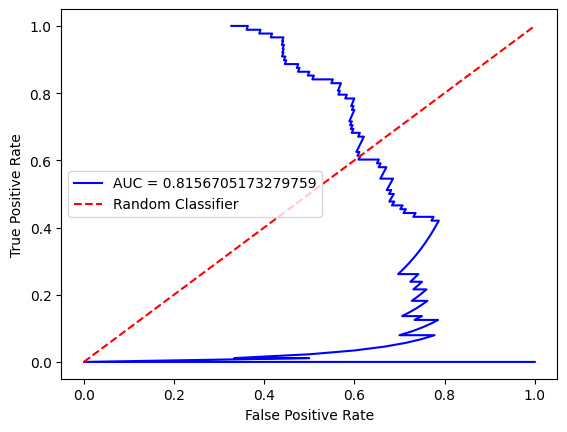

In [27]:
precision, recall, _ = precision_recall_curve(y_test, prob_estimate[:,1])
pr_auc = auc(recall,precision)

plt.plot(precision, recall,'b',label = f'AUC = {nilai_auc}')
plt.plot([0,1],[0,1], 'r--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

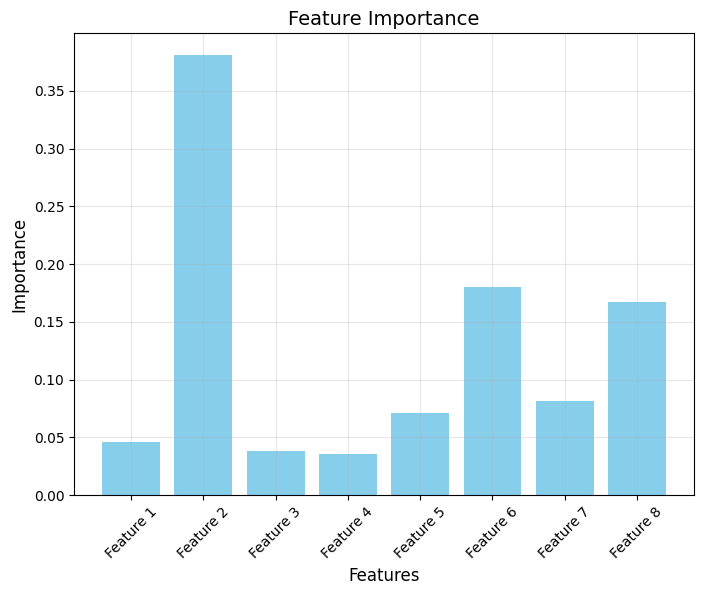

In [28]:
feature_importances = best_model.feature_importances_
features = [f'Feature {i+1}' for i in range(x.shape[1])]

plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
explainer = shap.Explainer(best_model.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x.columns)
shap.plots.bar(shap_values)